In [4]:
import os
import glob
import dqva
import random
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.quantum_info import Statevector

from utils.graph_funcs import *
from utils.helper_funcs import *

from ansatz import qaoa, qv_ansatz, dqv_ansatz, dqv_cut_ansatz

In [145]:
test_graphs = glob.glob('benchmark_graphs/N8_d4_graphs/*')
test_graphs = sorted(test_graphs, key=lambda g: int(g.split('/')[-1].strip('G.txt')))
print(len(test_graphs))

100


benchmark_graphs/N8_d4_graphs/G1.txt


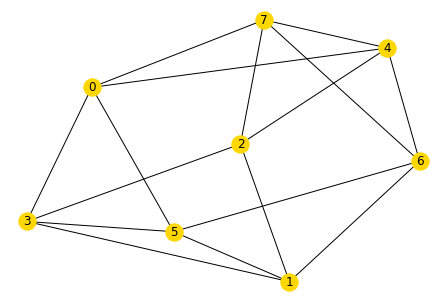

In [160]:
graph = test_graphs[0]
print(graph)
G = graph_from_file(graph)
nx.draw_spring(G, with_labels=True, node_color='gold')

# Test ansatz generation

In [5]:
nq = len(G.nodes())
P = 2
params = list(range(1, 2*P + 1))
mixer_order = list(range(nq))
random.shuffle(mixer_order)
circ = qaoa.gen_qaoa(G, P, params=params, init_state='0'*nq, barriers=2,
                     decompose_toffoli=2, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

betas: [1, 3]
gammas: [2, 4]
Mixer order: [3, 0, 5, 4, 1, 2]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]
Mixer order: [3, 0, 5, 4, 1, 2]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]


░ ┌───┐                                                                                                                             ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                                    ┌───┐   ┌───┐                                                                                                                                ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐         ░                                                                                                                                                                                                                                                                                                                                             ┌───────┐                                                                                                                                                                                                                                                                                                                       ░                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ░ ┌───┐                                                                                                                             ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                                    ┌───┐   ┌───┐                                                                                                                                ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐         ░ ┌───┐                                                                                                                             ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                                    ┌───┐   ┌───┐                                                                                                                                ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐   ┌──────────┐                        ┌───┐    ┌─────────┐                         ┌───┐         ░                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ░  ░ ┌───────┐ ░ ┌───┐                                                      

In [15]:
nq = len(G.nodes())
P = 2
params = list(range(1, P*(nq + 1) + 1))
mixer_order = list(range(nq))
random.shuffle(mixer_order)
circ = qv_ansatz.gen_qv_ansatz(G, P=P, params=params, init_state='0'*nq, barriers=2,
                               decompose_toffoli=0, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

alpha_0: [1, 2, 3, 4, 5, 6]
gamma_0: 7
alpha_1: [8, 9, 10, 11, 12, 13]
gamma_1: 14
Mixer order: [5, 0, 3, 1, 4, 2]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]
Mixer order: [5, 0, 3, 1, 4, 2]
qubit: 5 num_qubits = 7 neighbors: [1, 2, 4]
qubit: 0 num_qubits = 7 neighbors: [1, 4, 3]
qubit: 3 num_qubits = 7 neighbors: [0, 2, 4]
qubit: 1 num_qubits = 7 neighbors: [0, 2, 5]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
qubit: 2 num_qubits = 7 neighbors: [1, 5, 3]


░                      ░      ┌───────┐      ░                     ░                     ░                      ░                     ░  ░ ┌────────┐ ░                      ░      ┌────────┐      ░                      ░                      ░                      ░                      ░  ░ ┌────────┐ ░ 
  q_0: ─░──────────────────────░──────┤ RX(2) ├──────░───o─────────────o───░───o─────────────o───░───o──────────────o───░─────────────────────░──░─┤ RZ(14) ├─░──────────────────────░──────┤ RX(16) ├──────░───o──────────────o───░───o──────────────o───░───o──────────────o───░──────────────────────░──░─┤ RZ(28) ├─░─
        ░                      ░      └───┬───┘      ░   │             │   ░   │  ┌───────┐  │   ░   │              │   ░                     ░  ░ ├────────┤ ░                      ░      └───┬────┘      ░   │              │   ░   │  ┌────────┐  │   ░   │              │   ░                      ░  ░ ├────────┤ ░ 
  q_1: ─░───o──────────────o───░───o──────┼──────o───░───┼─────────────┼───░───┼──┤ RX(4) ├──┼───░───┼──────────────┼───░───o─────────────o───░──░─┤ RZ(14) ├─░───o──────────────o───░───o──────┼───────o───░───┼──────────────┼───░───┼──┤ RX(18) ├──┼───░───┼──────────────┼───░───o──────────────o───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │             │   ░   │  └───┬───┘  │   ░   │              │   ░   │  ┌───────┐  │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │              │   ░   │  └───┬────┘  │   ░   │              │   ░   │  ┌────────┐  │   ░  ░ ├────────┤ ░ 
  q_2: ─░───o──────────────o───░───┼──────┼──────┼───░───o─────────────o───░───o──────┼──────o───░───┼──────────────┼───░───┼──┤ RX(6) ├──┼───░──░─┤ RZ(14) ├─░───o──────────────o───░───┼──────┼───────┼───░───o──────────────o───░───o──────┼───────o───░───┼──────────────┼───░───┼──┤ RX(20) ├──┼───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │  ┌───────┐  │   ░   │      │      │   ░   │              │   ░   │  └───┬───┘  │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │  ┌────────┐  │   ░   │      │       │   ░   │              │   ░   │  └───┬────┘  │   ░  ░ ├────────┤ ░ 
  q_3: ─░───┼──────────────┼───░───o──────┼──────o───░───┼──┤ RX(8) ├──┼───░───┼──────┼──────┼───░───o──────────────o───░───o──────┼──────o───░──░─┤ RZ(14) ├─░───┼──────────────┼───░───o──────┼───────o───░───┼──┤ RX(22) ├──┼───░───┼──────┼───────┼───░───o──────────────o───░───o──────┼───────o───░──░─┤ RZ(28) ├─░─
        ░   │              │   ░   │      │      │   ░   │  └───┬───┘  │   ░   │      │      │   ░   │  ┌────────┐  │   ░   │      │      │   ░  ░ ├────────┤ ░   │              │   ░   │      │       │   ░   │  └───┬────┘  │   ░   │      │       │   ░   │  ┌────────┐  │   ░   │      │       │   ░  ░ ├────────┤ ░ 
  q_4: ─░───o──────────────o───░───o──────┼──────o───░───o──────┼──────o───░───┼──────┼──────┼───░───┼──┤ RX(10) ├──┼───░───┼──────┼──────┼───░──░─┤ RZ(14) ├─░───o──────────────o───░───o──────┼───────o───░───o──────┼───────o───░───┼──────┼───────┼───░───┼──┤ RX(24) ├──┼───░───┼──────┼───────┼───░──░─┤ RZ(28) ├─░─
        ░   │  ┌────────┐  │   ░   │      │      │   ░   │      │      │   ░   │      │      │   ░   │  └───┬────┘  │   ░   │      │      │   ░  ░ ├────────┤ ░   │  ┌────────┐  │   ░   │      │       │   ░   │      │       │   ░   │      │       │   ░   │  └───┬────┘  │   ░   │      │       │   ░  ░ ├────────┤ ░ 
  q_5: ─░───┼──┤ RX(12) ├──┼───░───┼──────┼──────┼───░───┼──────┼──────┼───░───o──────┼──────o───░───o──────┼───────o───░───o──────┼──────o───░──░─┤ RZ(14) ├─░───┼──┤ RX(26) ├──┼───░───┼──────┼───────┼───░───┼──────┼───────┼───░───o──────┼───────o───░───o──────┼───────o───░───o──────┼───────o───░──░─┤ RZ(28) ├─░─
        ░ ┌─┴─┐└───┬────┘┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░ ┌─┴─┐    │    ┌─┴─┐ ░  ░ └────────┘ ░ ┌─┴─┐└───┬────┘┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░ ┌─┴─┐    │     ┌─┴─┐ ░

In [10]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)

init_state = '101111'
num_nonzero = nq - hamming_weight(init_state)
print('lim1:', P * (nq + 1))
print('lim2:', (P+1) * (num_nonzero + 1))
num_params = min(P * (nq + 1), (P+1) * (num_nonzero + 1))
params = list(range(1, num_params + 1))
print(params)

circ = dqv_ansatz.gen_dqva(G, P=P, params=params, init_state=init_state, barriers=1,
                           decompose_toffoli=0, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

lim1: 7
lim2: 4
[1, 2, 3, 4]
alpha_0: [1]
gamma_0: 2
dyn_alpha: [3]
dyn_gamma: 4
init_state: 101111, alpha: [1], pad_alpha: [None, None, None, None, 1, None]
Mixer order: [2, 3, 0, 5, 4, 1]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]
init_state: 101111, alpha: [3], pad_alpha: [None, None, None, None, 3, None]
Mixer order: [2, 3, 0, 5, 4, 1]
qubit: 4 num_qubits = 7 neighbors: [0, 5, 3]


┌───┐ ░                     ░ ┌───────┐ ░                     ░ ┌───────┐
  q_0: ┤ X ├─░───o─────────────o───░─┤ RZ(4) ├─░───o─────────────o───░─┤ RZ(8) ├
       ├───┤ ░   │             │   ░ ├───────┤ ░   │             │   ░ ├───────┤
  q_1: ┤ X ├─░───┼─────────────┼───░─┤ RZ(4) ├─░───┼─────────────┼───░─┤ RZ(8) ├
       ├───┤ ░   │             │   ░ ├───────┤ ░   │             │   ░ ├───────┤
  q_2: ┤ X ├─░───┼─────────────┼───░─┤ RZ(4) ├─░───┼─────────────┼───░─┤ RZ(8) ├
       ├───┤ ░   │             │   ░ ├───────┤ ░   │             │   ░ ├───────┤
  q_3: ┤ X ├─░───o─────────────o───░─┤ RZ(4) ├─░───o─────────────o───░─┤ RZ(8) ├
       └───┘ ░   │  ┌───────┐  │   ░ ├───────┤ ░   │  ┌───────┐  │   ░ ├───────┤
  q_4: ──────░───┼──┤ RX(2) ├──┼───░─┤ RZ(4) ├─░───┼──┤ RX(6) ├──┼───░─┤ RZ(8) ├
       ┌───┐ ░   │  └───┬───┘  │   ░ ├───────┤ ░   │  └───┬───┘  │   ░ ├───────┤
  q_5: ┤ X ├─░───o──────┼──────o───░─┤ RZ(4) ├─░───o──────┼──────o───░─┤ RZ(8) ├
       └───┘ ░ ┌─┴─┐    │    ┌─┴─┐ ░ └───────┘ ░ ┌─┴─┐    │    ┌─┴─┐ ░ └───────┘
anc_0: ──────░─┤ X ├────■────┤ X ├─░───────────░─┤ X ├────■────┤ X ├─░──────────
             ░ └───┘         └───┘ ░           ░ └───┘         └───┘ ░

In [ ]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)

init_state = '101111'
num_nonzero = nq - hamming_weight(init_state)
print('lim1:', P * (nq + 1))
print('lim2:', (P+1) * (num_nonzero + 1))
num_params = min(P * (nq + 1), (P+1) * (num_nonzero + 1))
params = list(range(1, num_params + 1))
print(params)

circ = dqv_cut_ansatz.gen_cut_dqva(G, P=P, params=params, init_state=init_state, barriers=1,
                           decompose_toffoli=0, mixer_order=mixer_order, verbose=1)
circ.draw(fold=-1)

# Test each algorithm

In [5]:
nq = len(G.nodes())
P = 2
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'qasm'
shots = 10000
dqva.solve_mis_qaoa(init_state, G, P=P, m=3, mixer_order=mixer_order, sim=sim, shots=shots,
                    verbose=1)

Start round 1.1, Initial state = 000000
	Num params = 4
	Current Mixer Order: [2, 4, 1, 0, 3, 5]
	Optimal cost: -1.9995
	Found new independent set: 010100, Hamming weight = 2
Start round 1.2, Initial state = 010100
	Num params = 4
	Current Mixer Order: [2, 4, 1, 0, 3, 5]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
Start round 2.1, Initial state = 010100
	Num params = 4
	Current Mixer Order: [5, 1, 0, 4, 2, 3]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
Start round 3.1, Initial state = 010100
	Num params = 4
	Current Mixer Order: [3, 1, 0, 5, 4, 2]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 010100
	RETURNING, best hamming weight: 2


('010100',
 array([ 1.75494824,  1.30805435, -0.03984568, -0.17136397]),
 '000000',
 [2, 4, 1, 0, 3, 5],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -1.9995,
    'init_state': '000000',
    'mixer_order': [2, 4, 1, 0, 3, 5]},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [2, 4, 1, 0, 3, 5]}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [5, 1, 0, 4, 2, 3]}],
  [{'mixer_round': 3,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '010100',
    'mixer_order': [3, 1, 0, 5, 4, 2]}]])

In [5]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'statevector'
shots = 10000
dqva.solve_mis_qva(init_state, G, P=P, m=2, mixer_order=mixer_order, sim=sim, shots=shots,
                   verbose=1)

Start round 1.1, Initial state = 000000
	Num params = 7
	Current Mixer Order: [0, 1, 3, 5, 4, 2]
	Optimal cost: -2.00002
	Found new independent set: 100001, Hamming weight = 2
Start round 1.2, Initial state = 100001
	Num params = 7
	Current Mixer Order: [0, 1, 3, 5, 4, 2]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 100001
Start round 2.1, Initial state = 100001
	Num params = 7
	Current Mixer Order: [0, 1, 3, 2, 4, 5]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 100001
	RETURNING, best hamming weight: 2


('100001',
 array([ 1.5599838 ,  1.28540946,  1.5682869 ,  1.12516227,  1.12826922,
         1.29198086, -0.04768819]),
 '000000',
 [0, 1, 3, 5, 4, 2],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -2.00002,
    'init_state': '000000',
    'mixer_order': [0, 1, 3, 5, 4, 2]},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -2.0,
    'init_state': '100001',
    'mixer_order': [0, 1, 3, 5, 4, 2]}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '100001',
    'mixer_order': [0, 1, 3, 2, 4, 5]}]])

In [35]:
nq = len(G.nodes())
P = 1
mixer_order = list(range(nq))
random.shuffle(mixer_order)
init_state = '0'*nq
sim = 'qasm'
shots = 10000
dqva.solve_mis_dqva(init_state, G, P=P, m=2, mixer_order=mixer_order, sim=sim, shots=shots,
                    verbose=1)

Start round 1.1, Initial state = 000000
	Num params = 7
	Current Mixer Order: [5, 2, 4, 3, 0, 1]
	Optimal cost: -1.9999
	Found new independent set: 101000, Hamming weight = 2
Start round 1.2, Initial state = 101000
	Num params = 7
	Current Mixer Order: [5, 2, 4, 3, 0, 1]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 101000
Start round 2.1, Initial state = 101000
	Num params = 7
	Current Mixer Order: [5, 0, 1, 3, 4, 2]
	Optimal cost: -2.0
	None of the measured bitstrings had higher Hamming weight than: 101000
	RETURNING, best hamming weight: 2


('101000',
 array([1.61031585, 0.85190265, 1.58955917, 1.52308134, 1.31703717,
        1.10273248, 0.99783449]),
 '000000',
 [5, 1, 2, 3, 4, 0],
 [[{'mixer_round': 1,
    'inner_round': 1,
    'cost': -1.9999,
    'init_state': '000000',
    'mixer_order': [5, 1, 2, 3, 4, 0]},
   {'mixer_round': 1,
    'inner_round': 2,
    'cost': -2.0,
    'init_state': '101000',
    'mixer_order': [5, 1, 2, 3, 4, 0]}],
  [{'mixer_round': 2,
    'inner_round': 1,
    'cost': -2.0,
    'init_state': '101000',
    'mixer_order': [5, 1, 2, 3, 4, 0]}]])

# Plot results

In [25]:
def get_data(alg, P, sim, d):
    
    graph_sizes, mis_approxs, mis_list = [], [], []
    
    base_path = 'benchmark_results/{}_P{}_{}/'.format(alg, P, sim)
    graph_paths = 'N*_d{}_graphs/'.format(d)
    
    graph_dirs = glob.glob(base_path + graph_paths)
    graph_dirs = sorted(graph_dirs, key=lambda fn: int(fn.split('/')[-2].split('_')[0].strip('N')))
    
    for gd in graph_dirs:
        print(gd)
        graph_size = int(gd.split('/')[-2].split('_')[0].strip('N'))
        all_graphs = glob.glob(gd+'*')
        temp_mis_approx = []
        for graph in all_graphs:
            #print('\t', graph)
            graphfn = 'benchmark_graphs/' + '/'.join(graph.split('/')[-2:]) + '.txt'
            G = graph_from_file(graphfn)
            opt = brute_force_search(G)[1]
            #print('\t Opt =', opt)
            reps = glob.glob(graph+'/*')
            for pklfile in reps:
                #print('\t\t', pklfile)
                with open(pklfile, 'rb') as pf:
                    res = pickle.load(pf)
                    #print('\t'*3, res['graph'])
                    #print('\t'*3, res['out'][0])
                    temp_mis_approx.append(hamming_weight(res['out'][0]) / opt)
        
        # after collecting data for all graphs of this size,
        # store the average
        graph_sizes.append(graph_size)
        mis_approxs.append(np.mean(temp_mis_approx))
        mis_list.append(temp_mis_approx)
    
    return graph_sizes, mis_approxs, mis_list

# Load data in

In [34]:
d = 2
data = []
lists = []

In [35]:
qva_sizes, qva_mis, qva_mis_list = get_data('qva', 1, 'qasm', d)
data.append((qva_sizes, qva_mis, 'QVA, P=1'))
lists.append((qva_sizes, qva_mis_list, 'QVA, P=1'))

benchmark_results/qva_P1_qasm/N6_d2_graphs/
benchmark_results/qva_P1_qasm/N8_d2_graphs/
benchmark_results/qva_P1_qasm/N10_d2_graphs/
benchmark_results/qva_P1_qasm/N12_d2_graphs/
benchmark_results/qva_P1_qasm/N14_d2_graphs/
benchmark_results/qva_P1_qasm/N16_d2_graphs/


In [36]:
qaoa_sizes, qaoa_mis, qaoa_p1_mis_list = get_data('qaoa', 1, 'qasm', d)
data.append((qaoa_sizes, qaoa_mis, 'QAOA, P=1'))
lists.append((qaoa_sizes, qaoa_p1_mis_list, 'QAOA, P=1'))

benchmark_results/qaoa_P1_qasm/N6_d2_graphs/
benchmark_results/qaoa_P1_qasm/N8_d2_graphs/
benchmark_results/qaoa_P1_qasm/N10_d2_graphs/
benchmark_results/qaoa_P1_qasm/N12_d2_graphs/
benchmark_results/qaoa_P1_qasm/N14_d2_graphs/
benchmark_results/qaoa_P1_qasm/N16_d2_graphs/


In [37]:
qaoa_p2_sizes, qaoa_p2_mis, qaoa_p2_mis_list = get_data('qaoa', 2, 'qasm', d)
data.append((qaoa_p2_sizes, qaoa_p2_mis, 'QAOA, P=2'))
lists.append((qaoa_p2_sizes, qaoa_p2_mis_list, 'QAOA, P=2'))

benchmark_results/qaoa_P2_qasm/N6_d2_graphs/
benchmark_results/qaoa_P2_qasm/N8_d2_graphs/
benchmark_results/qaoa_P2_qasm/N10_d2_graphs/
benchmark_results/qaoa_P2_qasm/N12_d2_graphs/
benchmark_results/qaoa_P2_qasm/N14_d2_graphs/
benchmark_results/qaoa_P2_qasm/N16_d2_graphs/


In [31]:
qaoa_p3_sizes, qaoa_p3_mis, qaoa_p3_mis_list = get_data('qaoa', 3, 'qasm', d)
data.append((qaoa_p3_sizes, qaoa_p3_mis, 'QAOA, P=3'))
#lists.append((qaoa_sizes, qaoa_p3_mis_list, 'QAOA, P=3'))

benchmark_results/qaoa_P3_qasm/N12_d2_graphs/


In [38]:
dqva_sizes, dqva_mis, dqva_mis_list = get_data('dqva', 1, 'qasm', d)
data.append((dqva_sizes, dqva_mis, 'DQVA, P=1'))
lists.append((dqva_sizes, dqva_mis_list, 'DQVA, P=1'))

benchmark_results/dqva_P1_qasm/N6_d2_graphs/
benchmark_results/dqva_P1_qasm/N8_d2_graphs/
benchmark_results/dqva_P1_qasm/N10_d2_graphs/
benchmark_results/dqva_P1_qasm/N12_d2_graphs/
benchmark_results/dqva_P1_qasm/N14_d2_graphs/
benchmark_results/dqva_P1_qasm/N16_d2_graphs/


# Compare algorithms

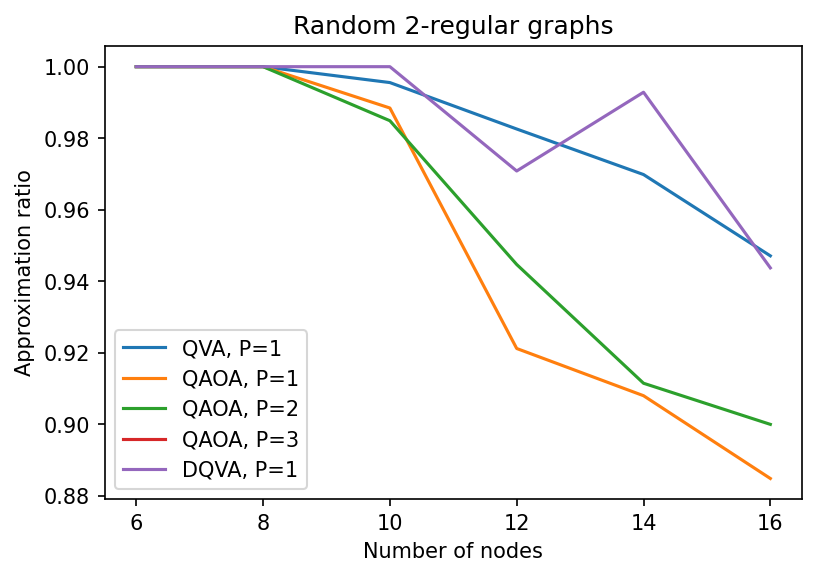

In [19]:
fig, ax = plt.subplots(dpi=150)

for sizes, approxs, label in data:
    ax.plot(sizes, approxs, label=label)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs'.format(d))
ax.legend()
plt.show()
plt.close()

In [54]:
mis_list = lists[0][1]
medians = [np.median(l) for l in mis_list]
print(medians)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[-0.2        -0.06666667  0.06666667  0.2       ]
QVA, P=1
QAOA, P=1
QAOA, P=2
DQVA, P=1


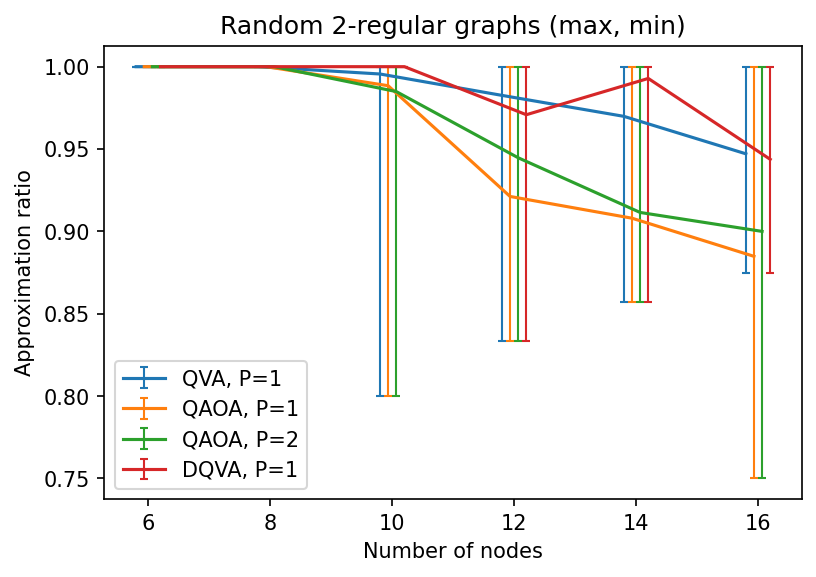

In [73]:
fig, ax = plt.subplots(dpi=150)

offset = np.linspace(-0.2, 0.2, len(lists))
print(offset)

for i, (sizes, mis_list, label) in enumerate(lists):
    print(label)
    sizes = np.array(sizes) + offset[i]
    vals = [np.mean(l) for l in mis_list]
    upper_err = [abs(np.max(l) - z) for l, z in zip(mis_list, vals)]
    lower_err = [abs(np.min(l) - z) for l, z in zip(mis_list, vals)]
    #print(vals)
    #print(upper_err)
    #print(lower_err)
    ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs (max, min)'.format(d))
ax.legend()
plt.show()
plt.close()

[-0.2        -0.06666667  0.06666667  0.2       ]
QVA, P=1
QAOA, P=1
QAOA, P=2
DQVA, P=1


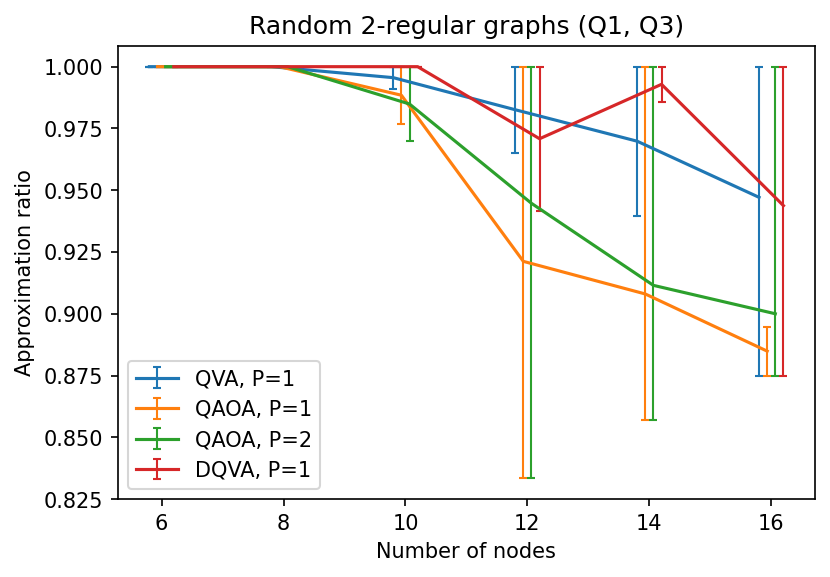

In [75]:
fig, ax = plt.subplots(dpi=150)

offset = np.linspace(-0.2, 0.2, len(lists))
print(offset)

for i, (sizes, mis_list, label) in enumerate(lists):
    print(label)
    sizes = np.array(sizes) + offset[i]
    vals = [np.mean(l) for l in mis_list]
    upper_err = [abs(np.quantile(l, 0.75) - z) for l, z in zip(mis_list, vals)]
    lower_err = [abs(np.quantile(l, 0.25) - z) for l, z in zip(mis_list, vals)]
    #print(vals)
    #print(upper_err)
    #print(lower_err)
    ax.errorbar(sizes, vals, yerr=[lower_err, upper_err], label=label, elinewidth=1, capsize=2)
    
ax.set_ylabel('Approximation ratio')
ax.set_xlabel('Number of nodes')
ax.set_title('Random {}-regular graphs (Q1, Q3)'.format(d))
ax.legend()
plt.show()
plt.close()

# Does DQVA improve in later rounds?

In [120]:
def get_pickles(alg, P, sim, n, d):
    
    retval = []
    
    base_path = 'benchmark_results/{}_P{}_{}/'.format(alg, P, sim)
    graph_paths = 'N{}_d{}_graphs/'.format(n, d)
    
    graph_dirs = glob.glob(base_path + graph_paths)
    graph_dirs = sorted(graph_dirs, key=lambda fn: int(fn.split('/')[-2].split('_')[0].strip('N')))
    
    for gd in graph_dirs:
        print(gd)
        all_graphs = glob.glob(gd+'*')
        temp_mis_approx = []
        for graph in all_graphs:
            print('\t', graph)
            graphfn = 'benchmark_graphs/' + '/'.join(graph.split('/')[-2:]) + '.txt'
            G = graph_from_file(graphfn)
            
            temp_name = graph.split('/')[-2:]
            graph_name = temp_name[0].strip('graphs') + temp_name[1]
            
            opt = brute_force_search(G)[1]
            #print('\t Opt =', opt)
            reps = glob.glob(graph+'/*')
            temp_pickles = []
            for pklfile in reps:
                #print('\t\t', pklfile)
                with open(pklfile, 'rb') as pf:
                    res = pickle.load(pf)
                    #print('\t'*3, res['graph'])
                    #print('\t'*3, res['out'][0])
                    temp_pickles.append(res['out'])
        
            # after collecting reps for this graph, store the results
            retval.append((G, opt, temp_pickles, graph_name))
            
    return retval

In [164]:
def plot_dqva_approxs(data, savedir=None, show=True, verbose=0):
    
    G, opt, outs, graph_name = data
    print(graph_name)
    print('Opt =', opt)
    
    fig, ax = plt.subplots(dpi=150)

    for r, out in enumerate(outs):
        best_mis, best_params, best_init, best_mixer, history = out
        if verbose > 0:
            print('\nRep', r + 1)
            print(best_mis, best_init, best_mixer, len(history))
        num_mixer_rounds = len(history)
        x_vals, y_vals = [], []
        for i, mixer_round in enumerate(history):
            num_inner_rounds = len(mixer_round)

            for j, inner_round in enumerate(mixer_round):
                x_vals.append(i+1 + j/(num_inner_rounds+1))
                y_vals.append(abs(inner_round['cost'] / opt))
                if verbose > 0:
                    print('\t Mixer={}, Inner={}'.format(i+1, j+1))
                    print('\t', inner_round)

        ax.plot(x_vals, y_vals, c='b', alpha=0.2)

    for i in range(1, num_mixer_rounds+1):
        ax.axvline(x=i, c='k', ls='--', alpha=0.3)

    ax.set_title('DQVA MIS approximations for Graph {}'.format(graph_name))
    ax.set_ylabel('Approximation Ratio')
    ax.set_xlabel('Mixer & Inner Rounds')
    
    if not savedir is None:
        if savedir[-1] != '/':
            savedir += '/'
        plt.savefig(savedir + graph_name + '.png')
        
    if show:
        plt.show()
    plt.close()

In [137]:
# Plot and save all of the dqva results
for N in [6, 8, 10, 12, 14, 16]:
    for d in [2, 3, 4, 5]:
        dqva_data = get_pickles('dqva', 1, 'qasm', N, d)
        for data in dqva_data:
            plot_dqva_approxs(data, savedir='figures/dqva_approximations/', show=False)

benchmark_results/dqva_P1_qasm/N6_d2_graphs/
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G12
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G15
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G14
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G13
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G100
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G16
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G11
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G18
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G19
	 benchmark_results/dqva_P1_qasm/N6_d2_graphs/G17
N6_d2_G12
Opt = 3
N6_d2_G15
Opt = 3
N6_d2_G14
Opt = 3
N6_d2_G13
Opt = 3
N6_d2_G100
Opt = 3
N6_d2_G16
Opt = 3
N6_d2_G11
Opt = 3
N6_d2_G18
Opt = 3
N6_d2_G19
Opt = 3
N6_d2_G17
Opt = 3
benchmark_results/dqva_P1_qasm/N6_d3_graphs/
	 benchmark_results/dqva_P1_qasm/N6_d3_graphs/G1
	 benchmark_results/dqva_P1_qasm/N6_d3_graphs/G12
	 benchmark_results/dqva_P1_qasm/N6_d3_graphs/G15
	 benchmark_results/dqva_P1_qasm/N6_d3_graphs/G14
	 benchmark_results/dqva_P1_q

benchmark_results/dqva_P1_qasm/N8_d4_graphs/
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G1
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G12
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G15
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G14
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G13
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G100
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G16
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G11
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G18
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G19
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G10
	 benchmark_results/dqva_P1_qasm/N8_d4_graphs/G17
N8_d4_G1


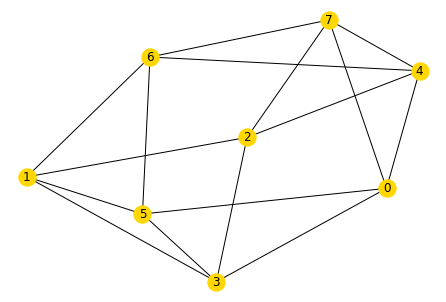

In [165]:
dqva_N8_d4_data = get_pickles('dqva', 1, 'qasm', 8, 4)
g1_data = dqva_N8_d4_data[0]
G, opt, outs, graph_name = g1_data
print(graph_name)
nx.draw_spring(G, with_labels=True, node_color='gold')

N8_d4_G1
Opt = 3

Rep 1
10000010 00000000 [1, 4, 7, 6, 5, 3, 2, 0] 4
	 Mixer=1, Inner=1
	 {'mixer_round': 1, 'inner_round': 1, 'cost': -1.9991455078125, 'init_state': '00000000', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=1, Inner=2
	 {'mixer_round': 1, 'inner_round': 2, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=2, Inner=1
	 {'mixer_round': 2, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=3, Inner=1
	 {'mixer_round': 3, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}
	 Mixer=4, Inner=1
	 {'mixer_round': 4, 'inner_round': 1, 'cost': -2.0, 'init_state': '10000010', 'mixer_order': [1, 4, 7, 6, 5, 3, 2, 0]}

Rep 2
10100000 00000000 [7, 5, 0, 3, 4, 2, 1, 6] 4
	 Mixer=1, Inner=1
	 {'mixer_round': 1, 'inner_round': 1, 'cost': -2.0, 'init_state': '00000000', 'mixer_order': [7, 5, 0, 3, 4, 2, 1, 6]}
	 Mixer=1, Inner=2
	 {'mixer_roun

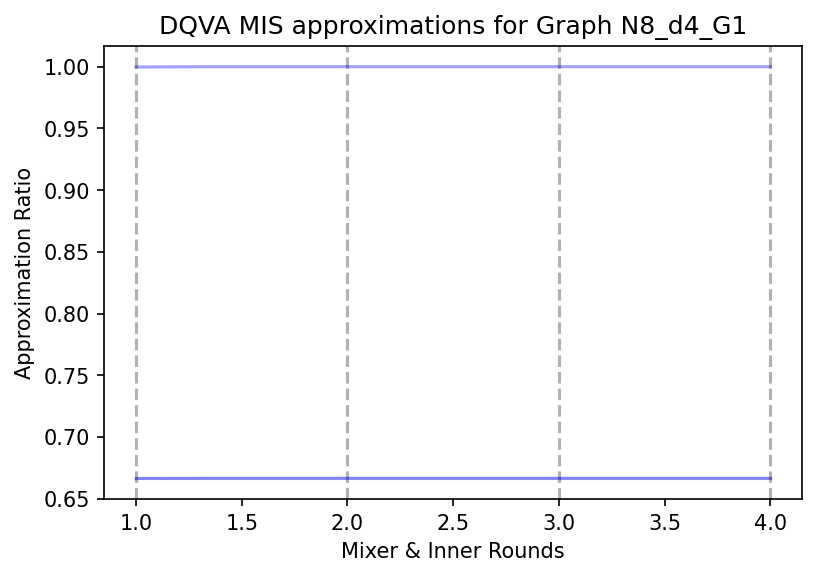

In [166]:
plot_dqva_approxs(g1_data, verbose=1)